In [ ]:
# ==========================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------
#        Enrique Alejandro Laurel Cossio, Mayo 2025
# ==========================================================
#        Regresión Lineal Simple y Múltiple
# ==========================================================

In [12]:
# Cargamos Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # modelo de regresion lineal
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split # train test

In [13]:
# cargamos datos
url="https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS_202505/refs/heads/main/data/insurance.csv"
seguros = pd.read_csv(url,sep=',', encoding='iso-8859-1')
print(seguros.shape) #
seguros.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Detalle de las variables
- age: Edad
- sex: sexo
- bmi: indices de masa corporal(para evaluar el riesgo de salud del asegurado)
- children: número de hijos
- smoker: fumador
- region: area donde habita
- chargues: costo del seguro



# 1. Exploración de datos

In [14]:
# Exploración de datos
# tipo de datos
seguros.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [16]:
seguros.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [17]:
# una copia de la fuente de datos
df = seguros.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# codificamos las variables
#df['sex'].replace({'male':0, 'female': 1}, inplace=True)
#df['smoker'].replace({'no':0, 'yes': 1}, inplace=True)
#df['region'].replace({'southwest':0, 'southeast': 1, 'northwest':2, 'northeast': 3}, inplace=True)

In [21]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


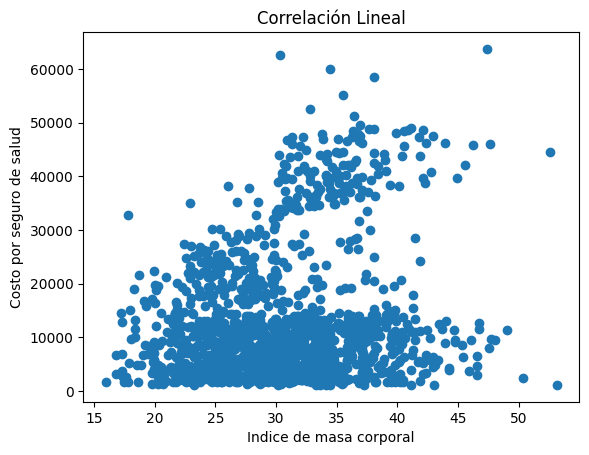

In [22]:
# grafico de dispersión
plt.scatter(df.bmi, df.charges)
plt.title('Correlación Lineal')
plt.xlabel('Indice de masa corporal')
plt.ylabel('Costo por seguro de salud')
plt.grid(False)

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

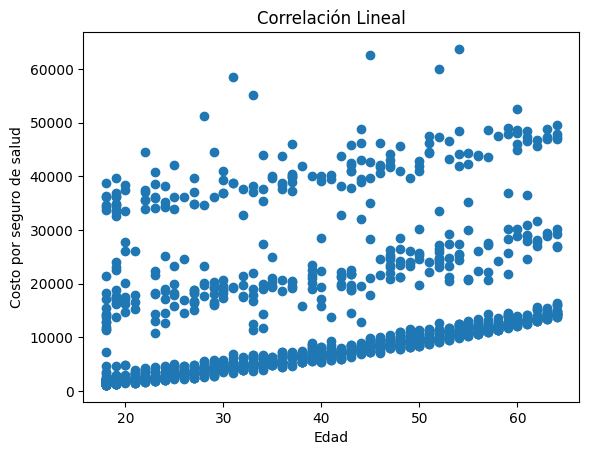

In [24]:
# grafico de dispersión
plt.scatter(df.age, df.charges)
plt.title('Correlación Lineal')
plt.xlabel('Edad')
plt.ylabel('Costo por seguro de salud')
plt.grid(False)

# 2. Modelo de Regresión

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [27]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [28]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
# a dummies las variables categoricas
df = pd.get_dummies(df, columns=['region'], drop_first=False)
print(df.shape)
df.head(2)

(1338, 10)


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,16884.9240,False,False,False,True
1,18,male,33.77,1,no,1725.5523,False,False,True,False


In [30]:
# a dummies
df = pd.get_dummies(df, columns=['sex','smoker'], drop_first=False)
print(df.shape)
df.head(2)

(1338, 12)


,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,0,16884.9240,False,False,False,True,True,False,False,True
1,18,33.77,1,1725.5523,False,False,True,False,False,True,True,False


In [31]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
region_northeast,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool
sex_female,bool
sex_male,bool


In [32]:
# variables dummies  a entero
df = df.replace({True: 1, False: 0})

<ipython-input-32-fd397598af70>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [33]:
# Definir las variables independientes y dependientes
#X = df[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest','region_southeast','region_southwest']]
X = df[['age']]#, 'sex_female', 'region_northeast','region_southeast','region_southwest']]
y = df['charges'] # variables dependiente

# Añadir una constante a las variables independientes
X = sm.add_constant(X) # relacionado intercepto

In [34]:
X.head()

,const,age
0,1.0,19
1,1.0,18
2,1.0,28
3,1.0,33
4,1.0,32


In [35]:
# División de conjunto de datos en entrenamiento y testeo
# train - test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =888 ) #Separamos 30% para test

In [36]:
print(X.shape)
X.head()

(1338, 2)


,const,age
0,1.0,19
1,1.0,18
2,1.0,28
3,1.0,33
4,1.0,32


In [37]:
print(x_train.shape) # el modelo entrada
print(x_test.shape) # evaluamos al modelo

(1070, 2)
(268, 2)


In [38]:
# Ajustar el modelo de regresión lineal
modelo_OLS = sm.OLS(y_train, x_train).fit()

# Resumen del modelo
print(modelo_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 21 May 2025   Prob (F-statistic):           2.57e-23
Time:                        23:07:18   Log-Likelihood:                -11563.
No. Observations:                1070   AIC:                         2.313e+04
Df Residuals:                    1068   BIC:                         2.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3173.5915   1085.570      2.923      0.0

In [39]:
# para ver la significancia de las variables independientes, se vera el p_valor
# a un valor de significacia alfa=0.05
# H0: B_i=0 # la variable X_i no aporta a la explicabilidad de Y
# H1: B_i!=0

# si p_valor<=alfa entonces se rechaza la hipotesis nula(H0)

In [40]:
df_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1)
print(df_train.shape)
df_train.head(2)

(1070, 3)


,const,age,charges
745,1.0,50,9910.35985
864,1.0,51,8782.46900


In [42]:
# Ajustando el modelo de regresion utilizando una formula:
resultados = smf.ols("charges ~ age ", data=df_train).fit()
#resultados = smf.ols("charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest", data=df_train).fit()

# Resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 21 May 2025   Prob (F-statistic):           2.57e-23
Time:                        23:08:32   Log-Likelihood:                -11563.
No. Observations:                1070   AIC:                         2.313e+04
Df Residuals:                    1068   BIC:                         2.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3173.5915   1085.570      2.923      0.0

# 3. Supuestos del Modelo

In [43]:
# Test de normalidad de residuos: Jarque-Bera
test = sms.jarque_bera(modelo_OLS.resid)
print(f'Estadígrafo Jarque-Bera (JB): {test[0]}')
print(f'p-value JB ~ chi^2(2): {test[1]}')
print(f'Sesgo: {test[2]}')
print(f'Curtosis: {test[3]}')
# Hipotesis Nula: Normalidad

Estadígrafo Jarque-Bera (JB): 640.4393597045939
p-value JB ~ chi^2(2): 8.51843950068625e-140
Sesgo: 1.6968983482567628
Curtosis: 4.687346723931437


In [44]:
# Test Homocedasticidad: Breusch–Pagan
test = sms.het_breuschpagan(modelo_OLS.resid, modelo_OLS.model.exog)
#print(f'Estadígrafo LMBP: {test[0]}')
#print(f'p-value LMBP ~ chi^2(k-1): {test[1]}')
print(f'Estadígrafo FBP: {test[2]}')
print(f'p-value FBP ~ F(k,n-k-1): {test[3]}')
# Hipotesis Nula: Homocedasticidad

Estadígrafo FBP: 0.00020709470739389154
p-value FBP ~ F(k,n-k-1): 0.988520898475708


In [45]:
# Correlacion de los errores: Test de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import norm
dw_stat = durbin_watson(modelo_OLS.resid)
print(f'Estadística de Durbin-Watson: {dw_stat}')
# Interpretación basada en valores críticos (asumiendo un nivel de significancia de 0.05)
# Nota: Los valores críticos dL y dU dependen de n y k
dL = 1.707 # Valor crítico inferior
dU = 1.831  # Valor crítico superior
if dw_stat < dL:
    print("Evidencia de autocorrelación positiva de primer orden")
elif dL <= dw_stat <= dU:
    print("Prueba inconclusa.")
else:
    print("No hay evidencia de autocorrelación positiva.")

Estadística de Durbin-Watson: 2.0726011608696786
No hay evidencia de autocorrelación positiva.


In [46]:
dw_stat

np.float64(2.0726011608696786)

In [47]:
# *** Evaluando multicolinealidad: VIF ***
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


#VIF ≥ 10: multicolinealidad severa
#VIF ≥ 5: multicolinealidad elevada
#VIF < 5: multicolinealidad débil a moderad
print(vif_data)

  Variable       VIF
0    const  8.792957
1      age  1.000000


# 4. Transformación de variables

In [48]:
df_train.charges.describe()

,charges
count,1070.000000
mean,13586.389990
std,12507.656883
min,1121.873900
25%,4746.521225
50%,9523.002925
75%,17166.118320
max,63770.428010


In [49]:
# los datos de costo del seguro se encuentran entre
df_train.charges.mean()-3*df_train.charges.std(), df_train.charges.mean()+3*df_train.charges.std()

(np.float64(-23936.580658559586), np.float64(51109.3606376979))

In [50]:
#
df_train_2=df_train.copy()

In [51]:
# creamos la variable logaritmo
df_train_2['log_charges']=np.log(df_train_2.charges)

In [52]:
df_train_2.log_charges.describe()

,log_charges
count,1070.000000
mean,9.113207
std,0.930125
min,7.022756
25%,8.465167
50%,9.161464
75%,9.750692
max,11.063045


In [53]:
# Ajustando el modelo de regresion utilizando una formula y transformación en la variable respuesta:
resultados = smf.ols("charges ~ age + sex_male + region_northwest + region_southeast + region_southwest", data=df_train).fit()
# + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest
# Resultados
print(resultados.summary())

PatsyError: Error evaluating factor: NameError: name 'region_northwest' is not defined
    charges ~ age + sex_male + region_northwest + region_southeast + region_southwest
                               ^^^^^^^^^^^^^^^^

In [ ]:
# Test Homocedasticidad: Breusch–Pagan
test = sms.het_breuschpagan(resultados.resid, resultados.model.exog)
print(f'Estadígrafo LMBP: {test[0]}')
print(f'p-value LMBP ~ chi^2(k-1): {test[1]}')
print(f'Estadígrafo FBP: {test[2]}')
print(f'p-value FBP ~ F(k,n-k-1): {test[3]}')
# Hipotesis Nula: Homocedasticidad

Estadígrafo LMBP: 59.84882162778725
p-value LMBP ~ chi^2(k-1): 4.990408532537394e-10
Estadígrafo FBP: 7.9152803503663
p-value FBP ~ F(k,n-k-1): 2.41902763308878e-10
